<a href="https://colab.research.google.com/github/workingbetter/ITNPAI1/blob/main/Optimisation_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy 
from itertools import permutations
import time

start = time.time()    #Times the code

########## Data for question 1
    
#Distance matrix Q1a
dist = numpy.array([[0, 4, 7, 6, 5],[4, 0, 7, 4, 8],[7, 7, 0, 9, 10],[6, 4, 9, 0, 3],[5, 8, 10, 3, 0]]) 


#Distance matrix Q1b    
dist = numpy.array([[0,17,10,5,4,9,14,10,21,16],[17,0,11,14,13,8,21,8,13,11],[10,11,0,6,7,5,10,4,10,5],[5,14,6,0,3,7,11,6,16,11],[4,13,7,3,0,5,14,6,17,12],[9,8,5,7,5,0,15,1,14,9],[14,21,10,11,14,15,0,14,14,11],[10,8,4,6,6,1,14,0,13,8],[21,13,10,16,17,14,14,13,0,5],[16,11,5,11,12,9,11,8 ,5,0]])    


########## Finds all possible permutations of paths of the required length

size = len(dist[1,:])  #Gives the number of nodes
path = []     #Start with an empty vector
for i in range(size):
    path.append(i+1)   #Buids up a vector of 1,2,3,4...,n  
all_paths = permutations (path)   #uses "permutations" command to get all paths


########## Calculates the distance of each path, one at a time
best_distance =999   #set an very high initial best distance (as minimising)
for route in all_paths:
    new_distance = dist[route[size-1]-1][route[0]-1] #  back to the start inclued first
    for i in range(size-1):
        new_distance = new_distance + dist[route[i]-1][route[i+1]-1] # now all the intermediate steps
    
    ##### Check if new path is shorter than best path      
    if new_distance < best_distance:
        best_distance = new_distance
        best_path = route

# print answer
print(best_path, best_distance)

end = time.time()
print('RunTime = ',end-start)   #prints out time taken for code to run



(1, 4, 7, 3, 10, 9, 2, 8, 6, 5) 67
RunTime =  21.249008655548096


#Q2

In [10]:
import numpy 
from itertools import permutations
import time

start = time.time()    #Times the code

########## Data for the question 2 (random matrix)
# n = int(input())
nlist = [7, 8, 9, 10]
# n=5   #size of problem (number of nodes/cities)
def bruteforce(a):
  for n in a:
    dist = numpy.random.randint(1,20,(n,n))  #Random integer matrix, size n (min=1, max=20 here)  


    ########## Finds all possible permutations of paths of the required length

    size = len(dist[1,:])  #Gives the number of nodes
    path = []     #Start with an empty vector
    for i in range(size):
        path.append(i+1)   #Buids up a vector of 1,2,3,4...,n  
    all_paths = permutations (path)   #uses "permutations" command to get all paths


    ########## Calculates the distance of each path, one at a time
    best_distance =999   #set an very high initial best distance (as minimising)
    for route in all_paths:
        new_distance = dist[route[size-1]-1][route[0]-1] #  back to the start inclued first
        for i in range(size-1):
            new_distance = new_distance + dist[route[i]-1][route[i+1]-1] # now all the intermediate steps
        
        ##### Check if new path is shorter than best path      
        if new_distance < best_distance:
            best_distance = new_distance
            best_path = route

    # print answer
    print(f"n = {n}")
    print(best_path, best_distance)

    end = time.time()
    print('RunTime = ',end-start)   #prints out time taken for code to run

bruteforce(nlist)

n = 7
(1, 3, 2, 4, 7, 5, 6) 30
RunTime =  0.026466846466064453
n = 8
(1, 7, 2, 5, 6, 4, 8, 3) 37
RunTime =  0.17508149147033691
n = 9
(1, 2, 8, 7, 9, 4, 6, 3, 5) 33
RunTime =  1.6787166595458984
n = 10
(1, 3, 2, 10, 5, 6, 9, 7, 4, 8) 33
RunTime =  19.956178426742554


In [11]:
bruteforce([11, 12])

n = 11
(1, 3, 8, 9, 5, 2, 10, 4, 6, 7, 11) 41
RunTime =  284.8478138446808


KeyboardInterrupt: ignored

# part2 hill climb

#Q 3


In [19]:
import random
import numpy 

########## Data for the question

### Distance Matrix Question 3
dist = numpy.array([
    [0,17,10,5,4,9,14,10,21,16],
    [17,0,11,14,13,8,21,8,13,11], 
    [10,11,0,6,7,5,10,4,10,5],
    [5,14,6,0,3,7,11,6,16,11],
    [4,13,7,3,0,5,14,6,17,12],
    [9,8,5,7,5,0,15,1,14,9],
    [14,21,10,11,14,15,0,14,14,11],
    [10,8,4,6,6,1,14,0,13,8],
    [21,13,10,16,17,14,14,13,0,5],
    [16,11,5,11,12,9,11,8,5,0]
    ])    
    

## Distance Matrix Question 4
dist = numpy.array([   
    [0, 50, 49, 63, 47,	57, 37, 72, 42, 49, 68, 65, 10, 52, 85],
    [50, 0, 71, 89, 11,	51, 54, 71, 72, 55, 84, 67, 54, 48, 87],
    [49, 71, 0, 28, 3, 88, 75, 70, 88, 86, 51, 104, 59, 80, 76],
    [63, 89, 28, 0, 30, 83, 77, 50, 95, 84, 28, 102, 73, 75, 52],
    [47, 11, 3, 30, 0, 86, 73, 70, 86, 84, 52, 102, 57, 79, 77],
    [57, 51, 88, 83, 86, 0, 21, 51, 37, 11, 66, 21, 55, 8, 65], 
    [37, 54, 75, 77, 73, 21, 0, 59, 21, 13, 67, 29, 34, 21, 74],
    [72, 71, 70, 50, 70, 51, 59, 0, 80, 58, 23, 71, 78, 43, 15],
    [42, 72, 88, 95, 86, 37, 21, 80, 0, 26, 88, 31, 34, 40, 95],
    [49, 55, 86, 84, 84, 11, 13, 58, 26, 0, 71, 18, 47, 15, 73],
    [68, 84, 51, 28, 52, 66, 67, 23, 88, 71, 0, 86, 76, 58, 25],
    [65, 67, 104, 102, 102, 21, 29, 71, 31, 18, 86, 0, 60, 29, 85],
    [10, 54, 59, 73, 57, 55, 34, 78, 34, 47, 76, 60, 0, 53, 92],
    [52, 48, 80, 75, 79, 8, 21, 43, 40, 15, 58, 29, 53, 0, 58],
    [85, 87, 76, 52, 77, 65, 74, 15, 95, 73, 25, 85, 92, 58, 0],
    ]) 

########## Create initial solution
for h in range(20):

  size = len(dist[1,:])    #Gives the number of nodes
  best_path = []
  for i in range(size):
      best_path.append(i+1)   #Buids up a vector of 1,2,3,4...,n    
  random.shuffle(best_path)  #Randomise path to get initial solution


  ##### Find distance of initial solution


  best_distance =  dist[best_path[size-1]-1][best_path[0]-1]  #Distance from final node to start  node
  for i in range(size-1):
      best_distance = best_distance + dist[best_path[i]-1][best_path[i+1]-1]  #Add distances of each part of the path


  ##########Hill-climb Algorithm

  number_of_swaps = 5000 #Number of hill-climb steps

  for x in range(number_of_swaps) :
      ##### Create a new path
      entry1 = random.randint(1,len(best_path)-1) # randomly choose first entry
      entry2 = random.randint(1,len(best_path)-1) # randomly choose second entry
      new_path = best_path.copy() 
      new_path[entry1],new_path[entry2] = new_path[entry2],new_path[entry1] #changes the vector given the two random entries to swap
      
      ##### Calculate distance of the new path
      new_distance = dist[new_path[size-1]-1][new_path[0]-1]  #Distance from final node to start node
      for i in range(len(new_path)-1):
          new_distance = new_distance + dist[new_path[i]-1][new_path[i+1]-1]
          
      ##### Check if new path is shorter than best path  
      if new_distance < best_distance:
          best_path = new_path.copy()
          best_distance = new_distance

  print(f"run {h+1}")    
  print (best_path,best_distance)


run 1
[9, 10, 2, 5, 3, 4, 11, 15, 8, 1, 13, 7, 14, 6, 12] 388
run 2
[7, 1, 2, 5, 3, 4, 11, 14, 6, 8, 15, 13, 9, 12, 10] 477
run 3
[1, 13, 7, 10, 6, 14, 8, 15, 11, 4, 3, 5, 2, 12, 9] 369
run 4
[8, 6, 12, 10, 7, 9, 13, 1, 3, 5, 2, 14, 4, 11, 15] 422
run 5
[14, 1, 13, 9, 7, 10, 12, 6, 15, 8, 2, 5, 3, 4, 11] 448
run 6
[13, 15, 8, 14, 2, 5, 3, 4, 11, 6, 12, 10, 7, 9, 1] 459
run 7
[7, 12, 9, 13, 1, 2, 5, 3, 4, 11, 15, 8, 14, 6, 10] 339
run 8
[3, 4, 11, 15, 8, 14, 6, 10, 2, 5, 1, 7, 12, 9, 13] 461
run 9
[11, 4, 13, 1, 3, 5, 2, 14, 6, 10, 12, 9, 7, 8, 15] 410
run 10
[6, 10, 7, 9, 13, 1, 2, 5, 3, 4, 11, 15, 8, 14, 12] 342
run 11
[8, 11, 1, 13, 9, 7, 2, 5, 3, 4, 14, 10, 12, 6, 15] 461
run 12
[9, 7, 8, 15, 11, 4, 13, 1, 3, 5, 2, 14, 6, 10, 12] 410
run 13
[9, 12, 6, 10, 13, 1, 4, 3, 5, 2, 14, 8, 15, 11, 7] 444
run 14
[3, 4, 11, 15, 8, 14, 6, 12, 10, 7, 9, 13, 1, 2, 5] 328
run 15
[3, 4, 11, 1, 13, 9, 7, 10, 12, 6, 14, 15, 8, 2, 5] 407
run 16
[11, 4, 3, 5, 2, 14, 10, 9, 12, 6, 15, 8, 7, 13, 1] 462
r

# part 3

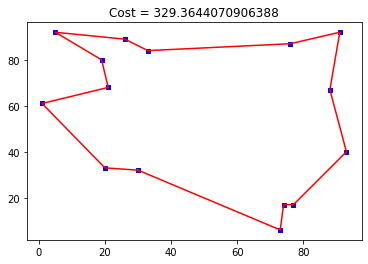

[1, 13, 9, 7, 10, 12, 6, 14, 8, 15, 11, 4, 3, 5, 2] 329.3644070906388


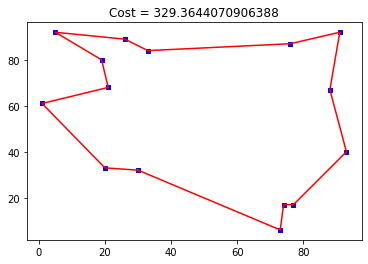

[1, 13, 9, 7, 10, 12, 6, 14, 8, 15, 11, 4, 3, 5, 2] 329.3644070906388


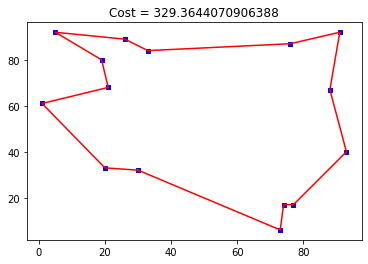

[1, 2, 5, 3, 4, 11, 15, 8, 14, 6, 12, 10, 7, 9, 13] 329.3644070906388


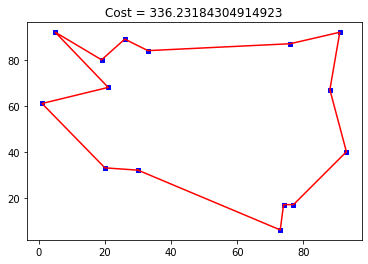

[1, 2, 5, 3, 4, 11, 15, 8, 14, 6, 10, 12, 7, 9, 13] 336.23184304914923


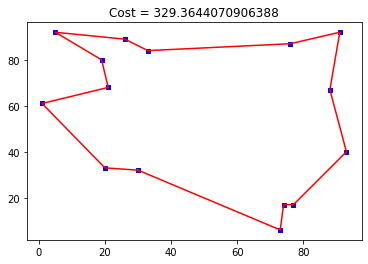

[1, 13, 9, 7, 10, 12, 6, 14, 8, 15, 11, 4, 3, 5, 2] 329.3644070906388


In [34]:
###Example of a Genetic Algirthm for TSP 

# PART 1 = Creates the Distance Matrix
# PART 2 = Plots the optimial route on a map.
# PART 3 = Calculates the distance of a given path
# PART 4 = Main GA parameters (Probability of creating each type of child)
# PART 5 = Carries out a Crossover
# PART 6 = Carries out a Mutation
# PART 7 = Selects the fittest parents
# PART 8 = Creates the new population for the next generation
# PART 9 = number of generations
# PART 10 =  Input the data for the problem
# PART 11 = Run the main GA (including population size)





import sys, math, random, heapq
import matplotlib.pyplot as plt
from itertools import chain

if sys.version_info < (3, 0):
   sys.exit("""Sorry, requires Python 3.x, not Python 2.x.""")

class Graph:

    def __init__(self, vertices):
        self.vertices = vertices
        self.n = len(vertices)

    def x(self, v):
        return self.vertices[v][0]

    def y(self, v):
        return self.vertices[v][1]

    # Lookup table for distances
    _d_lookup = {}

###########################################################################
##### PART 1: Converts grid co-ordinates of the nodes into a distance matrix

    def d(self, u, v):
        # Check if the distance was computed before
        if (u, v) in self._d_lookup:
            return self._d_lookup[(u, v)]
        # Otherwise compute euclidean distance
        _distance = math.sqrt((u[0] - v[0])**2 + (u[1] - v[1])**2)
        # Add to dictionary
        self._d_lookup[(u, v)], self._d_lookup[(v, u)] = _distance, _distance
        return _distance

###########################################################################
##### PART 2: Plots the final optimal route

    def plot(self, tour=None):
        """Plots the cities and superimposes given tour"""
        if tour is None:
            tour = Tour(self, [])

        _vertices = [self.vertices[0]]

        for i in tour.vertices:
            _vertices.append(self.vertices[i])

        _vertices.append(self.vertices[0])

        plt.title("Cost = " + str(tour.cost()))
        plt.plot(*zip(*_vertices), '-r')
        plt.scatter(*zip(*self.vertices), c="b", s=10, marker="s")
        plt.show()

###########################################################################
##### PART 3: Calculates the distance of a given (full) path
class Tour:

    def __init__(self, g, vertices = None):
        """Generate random tour in given graph g"""
        self.g = g
        if vertices is None:
            self.vertices = list(range(1, g.n))
            random.shuffle(self.vertices)
        else:
            self.vertices = vertices
        self.__cost = None

    def cost(self):
        """Return total edge-cost of tour"""
        if self.__cost is None:
            self.__cost = 0
            for i, j in zip([0] + self.vertices, self.vertices + [0]):
                self.__cost += self.g.d(self.g.vertices[i], self.g.vertices[j])
        return self.__cost

###########################################################################
##### PART 4: IMPORTANT Main GA parameters (Probability of creating each type of child)

class GeneticAlgorithm:

    def __init__(self, g, population_size, k=5, elite_mating_rate=0.5,
                 mutation_rate=0.015, mutation_swap_rate=0.2):   #Probability of each type of child being created
        """Initialises algorithm parameters"""

        self.g = g
        
        self.population = []
        for _ in range(population_size):
            self.population.append(Tour(g))

        self.population_size = population_size
        self.k = k
        self.elite_mating_rate = elite_mating_rate
        self.mutation_rate = mutation_rate
        self.mutation_swap_rate = mutation_swap_rate
        
###########################################################################
##### PART 5 = Crossover - as described in Teaching Material (Week 11 = AI)

    def crossover(self, mum, dad):
        """Implements ordered crossover"""

        size = len(mum.vertices)

        # Choose random start/end position for crossover
        alice, bob = [-1] * size, [-1] * size
        start, end = sorted([random.randrange(size) for _ in range(2)])

        # Replicate mum's sequence for alice, dad's sequence for bob
        for i in range(start, end + 1):
            alice[i] = mum.vertices[i]
            bob[i] = dad.vertices[i]

        # Fill the remaining position with the other parents' entries
        current_dad_position, current_mum_position = 0, 0

        for i in chain(range(start), range(end + 1, size)):

            while dad.vertices[current_dad_position] in alice:
                current_dad_position += 1

            while mum.vertices[current_mum_position] in bob:
                current_mum_position += 1

            alice[i] = dad.vertices[current_dad_position]
            bob[i] = mum.vertices[current_mum_position]

        # Return twins
        return Tour(self.g, alice), Tour(self.g, bob)

###########################################################################
##### PART 6 = Mutation - swaps pairs, as in TSP_HillClimb.py and described in Week 10, but can swap multiple pairs.
    def mutate(self, tour):
        """Randomly swaps pairs of cities in a given tour according to mutation rate"""

        # Decide whether to mutate
        if random.random() < self.mutation_rate:

            # For each vertex
            for i in range(len(tour.vertices)):

                # Randomly decide whether to swap node i
                if random.random() < self.mutation_swap_rate:

                    # Randomly choose other node to swap j
                    j = random.randrange(len(tour.vertices))

                    # Swap i and j
                    tour.vertices[i], tour.vertices[j] = tour.vertices[j], tour.vertices[i]

###########################################################################
##### PART 7 = Selects the fittest parents = takes a random sample of solutions and picks "best" solutions from that sample
    def select_parent(self, k):
        """Implements k-tournament selection to choose parents"""
        tournament = random.sample(self.population, k)
        return max(tournament, key=lambda t: t.cost())


###########################################################################
##### PART 8 = Creates the new population for the next generation

    def evolve(self):
        """Executes one iteration of the genetic algorithm to obtain a new generation"""

        new_population = []

        for _ in range(self.population_size):

            # K-tournament for parents
            mum, dad = self.select_parent(self.k), self.select_parent(self.k)
            alice, bob = self.crossover(mum, dad)

            # keep children if better than a parent
            if random.random() < self.elite_mating_rate:
                if alice.cost() < mum.cost() or alice.cost() < dad.cost():
                    new_population.append(alice)
                if bob.cost() < mum.cost() or bob.cost() < dad.cost():
                    new_population.append(bob)

            else:
                self.mutate(alice)
                self.mutate(bob)
                new_population += [alice, bob]

        # Add new population to old
        self.population += new_population

        # Take the fittest individuals in population, including Elitism
        self.population = heapq.nsmallest(self.population_size, self.population, key=lambda t: t.cost())

###########################################################################
##### PART 9 = IMPORTANT ##### number of generations = (similar to number of steps in hill-climb)

    def run(self, iterations=200):  #Number of Generations: more = better, but takes longer
        for _ in range(iterations):
            self.evolve()

    def best(self):
        return max(self.population, key=lambda t: t.cost())

###########################################################################
##### PART 10 =  IMPORTANT ## Input the data for the problem

#Practical 9, Question 5
g = Graph([
(30,32),
(73,6),
(77,17),
(93,40),
(74,17),
(26,89),
(21,68),
(76,87),
(1,61),
(19,80),
(88,67),
(5,92),
(20,33),
(33,84),
(91,92),
])

###########################################################################
##### PART 11 = IMPORTANT ## Runs the main GA (including population size)
for _ in range(5):

  ga = GeneticAlgorithm(g, 100)    #Inputs (graph co-ordinates, POPULATION SIZE)  more = better, but takes longer
  ga.run()


  ########## Output
  best_tour = ga.best()
  g.plot(best_tour)   #Plots the path on a graph

  best_path = best_tour.vertices
  size = len (g.vertices)
  for i in range(size-1):
      best_path[i]=best_path[i]+1   #Must +1 to nodes to chnage numbering from (0,n-1) to (1,n)
  best_path.insert(0,1)   #Adds start node to the list
  print(best_path,best_tour._Tour__cost)   #Prints the best path and distance
